In [5]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------------- ------ 6.8/8.1 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 31.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 29.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------  6.8/7.0 MB 38.7 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 32.9 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- -----

## Preguntas obligatorias

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

dataRecorridosTresMeses = pd.read_csv("../data/processed/recorridos_usuarios_3meses.csv")
dataRecorridosTresMeses.head(5)

,idRecorrido,duracionRecorrido,fechaOrigenRecorrido,idEstacionOrigen,nombreEstacionOrigen,direccionEstacionOrigen,longEstacionOrigen,latEstacionOrigen,fechaDestinoRecorrido,idEstacionDestino,...,latEstacionDestino,idUsuario,modeloBicicleta,genero,generoUsuario,edadUsuario,fechaAlta,horaAlta,duracion_horas_minutos,duracion_viaje_minutos
0,22751201,2,2024-08-24 12:37:54,548,051 - PLAZA SUDAMERICA,Av. Piedrabuena 4901,-58.475178,-34.687767,2024-08-24 12:37:56,548,...,-34.687767,1195811.0,ICONIC,MALE,MALE,44.0,2024-08-24,12:32:34,0h 2m,0h 2m
1,22526638,1350,2024-08-02 01:29:21,46,046 - Chile,Perú 718,-58.374370,-34.616373,2024-08-02 01:51:51,223,...,-34.623400,1126622.0,FIT,FEMALE,FEMALE,22.0,2024-03-11,00:53:54,22h 30m,22h 30m
2,22527526,1398,2024-08-02 07:26:40,408,364 - CERRETTI Y MANUELA PEDRAZA,Ceretti 3407,-58.500250,-34.569120,2024-08-02 07:49:58,513,...,-34.597130,569548.0,FIT,MALE,NaN,NaN,NaN,NaN,23h 18m,23h 18m
3,22517654,491,2024-08-01 12:51:39,368,378 - AGRONOMIA,4351 San Martin,-58.482079,-34.598070,2024-08-01 12:59:50,241,...,-34.600874,569548.0,ICONIC,MALE,NaN,NaN,NaN,NaN,8h 11m,8h 11m
4,22524071,1642,2024-08-01 19:12:28,385,268 - Plaza Aristóbulo Del Valle,Campana & Marcos Sastre,-58.493141,-34.606160,2024-08-01 19:39:50,408,...,-34.569120,569548.0,FIT,MALE,NaN,NaN,NaN,NaN,27h 22m,27h 22m


### ¿Cuál fue la cantidad total de viajes realizados por usuarios de entre 25 y 35 años durante los tres meses seleccionados?


In [3]:
usuarios_25_35 = dataRecorridosTresMeses[(dataRecorridosTresMeses['edadUsuario'] >= 25) & (dataRecorridosTresMeses['edadUsuario'] <= 35)]
total_viajes_25_35 = len(usuarios_25_35)

print(f"La cantidad total de viajes realizados por usuarios de entre 25 y 35 años es: {total_viajes_25_35}")

La cantidad total de viajes realizados por usuarios de entre 25 y 35 años es: 82464


### ¿Cuáles fueron las 5 estaciones de inicio con mayor cantidad de viajes en esos tres meses?

In [4]:
top_5_estaciones_origen = dataRecorridosTresMeses['nombreEstacionOrigen'].value_counts().head(5)
print("Las 5 estaciones de inicio con mayor cantidad de viajes en esos tres meses son:")
print(top_5_estaciones_origen)

Las 5 estaciones de inicio con mayor cantidad de viajes en esos tres meses son:
nombreEstacionOrigen
368 - PLAZA DE LA SHOÁ       9401
014 - Pacifico               9098
005 - Plaza Italia           8392
147 - Constitución           7881
001 - FACULTAD DE DERECHO    7718
Name: count, dtype: int64


### Entre los usuarios frecuentes (más de 15 viajes en el período), ¿cuál es la distribución por género?

In [5]:
# Identify frequent users (more than 15 trips)
frequent_users = dataRecorridosTresMeses.groupby('idUsuario').filter(lambda x: len(x) > 15)

# Get the gender distribution among frequent users
gender_distribution_frequent_users = frequent_users['generoUsuario'].value_counts()

print("Distribución por género entre los usuarios frecuentes:")
print(gender_distribution_frequent_users)

Distribución por género entre los usuarios frecuentes:
generoUsuario
MALE      102597
FEMALE     45655
OTHER       1878
Name: count, dtype: int64


### Graficos

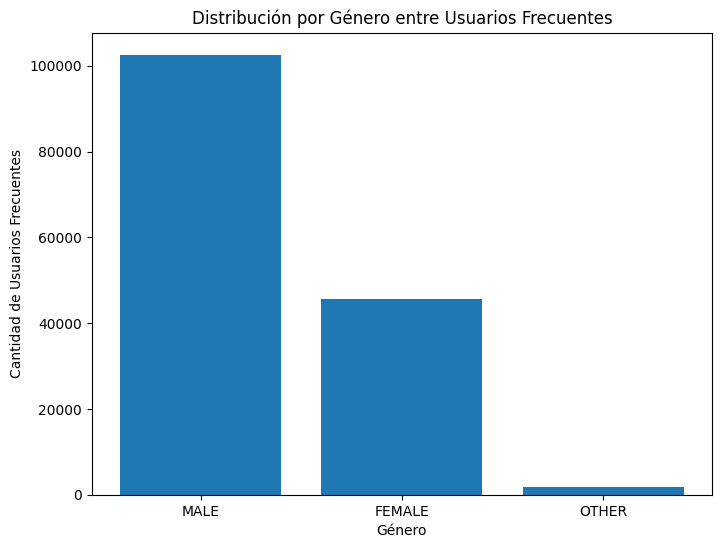

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(gender_distribution_frequent_users.index, gender_distribution_frequent_users.values)
plt.title('Distribución por Género entre Usuarios Frecuentes')
plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios Frecuentes')
plt.show()

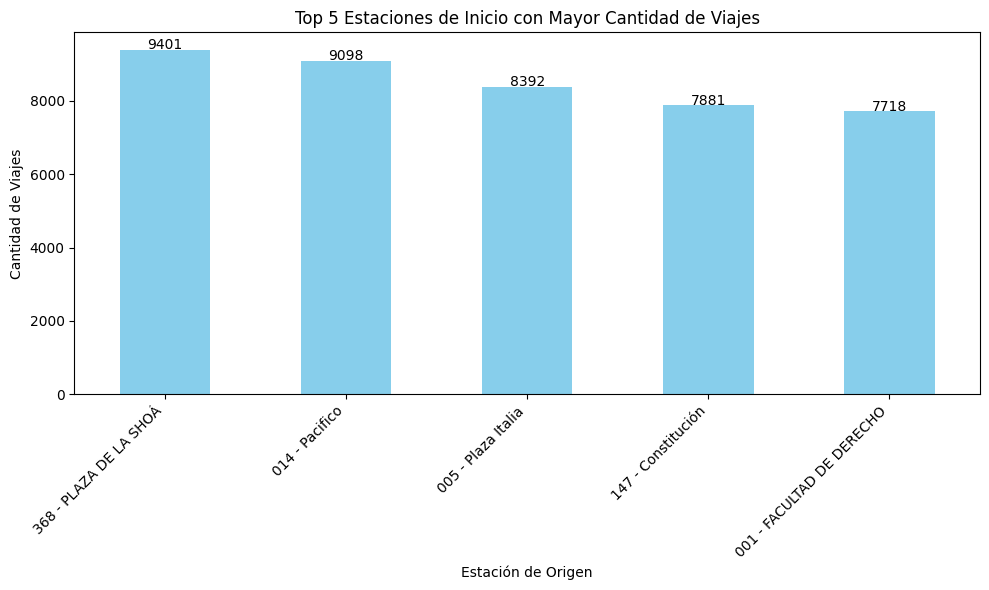

In [7]:
plt.figure(figsize=(10, 6))
top_5_estaciones_origen.plot(kind='bar', color='skyblue')

plt.title('Top 5 Estaciones de Inicio con Mayor Cantidad de Viajes')
plt.xlabel('Estación de Origen')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45, ha='right')

# Agrega el conteo en la parte superior de cada barra.
for index, value in enumerate(top_5_estaciones_origen):
    plt.text(index, value + 20, str(value), ha='center') 

plt.tight_layout()
plt.show()